# Visualize Convolutional Layers of a pre=trained mode

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
mnist = tf.keras.datasets.mnist
from tensorflow import keras

In [2]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
# download the model
model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [ ]:
# notice the expcted input shape
model.input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor>

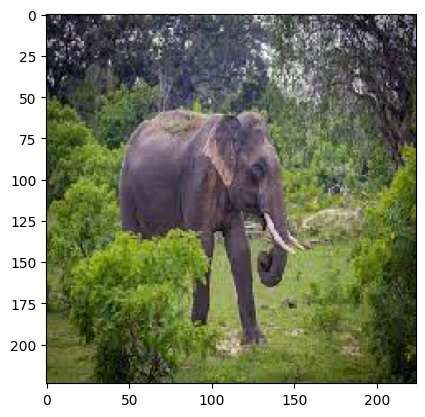

In [ ]:
# define a trial image; an elephant
img_path = 'elephant.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
plt.imshow(img)

In [115]:
# transform the image into an array
x = keras.utils.img_to_array(img)
# make it shape (1, 244, 244, 3)
x = np.expand_dims(x, axis=0)
# preprocess its pixel values; i.e maybe normalize
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
Predicted: [('n01871265', 'tusker', 0.68036485), ('n02504013', 'Indian_elephant', 0.3023313), ('n02504458', 'African_elephant', 0.01722368)]


In [116]:
x = keras.utils.img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = preprocess_input(x)
print(x.shape)


(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [ ]:
model.summary()

In [45]:
# get the activation layers
activation_layers = [layer.output for layer in model.layers if isinstance(layer, keras.layers.Activation)]
print(f'number of activation layers in model is {len(activation_layers)}')

number of activation layers in model is 49


In [62]:
# define a model that inputs a picture and outputs the output of each activation layer 
model_cnn_layers = keras.Model(inputs = model.inputs,
                               outputs = activation_layers
                               )

# call the model on our image
outputs = model_cnn_layers(x)

In [99]:
def plot_one_layer_output(images, n_cols = 8, n_block = 64, ):
    assert len(images.shape) == 3

    n_channels = images.shape[2]

    n_rows = n_block//n_cols

    repeat = n_channels//n_block

    for k in range(repeat):
        print(f'filters {k*n_block} - {(k+1)*n_block}')
        # Create figure and axes
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))

        # Flatten axes array for easy iteration
        axes = axes.ravel()

        for i in range(n_block):
            axes[i].imshow(images[:,:,i+k*n_block],
                            # cmap='gray'
                            )
            axes[i].axis('off')

        # Adjust layout and show plot
        plt.tight_layout()
        plt.show()

filters activations at activation layer 1, shape (112, 112, 64)
filters 0 - 64


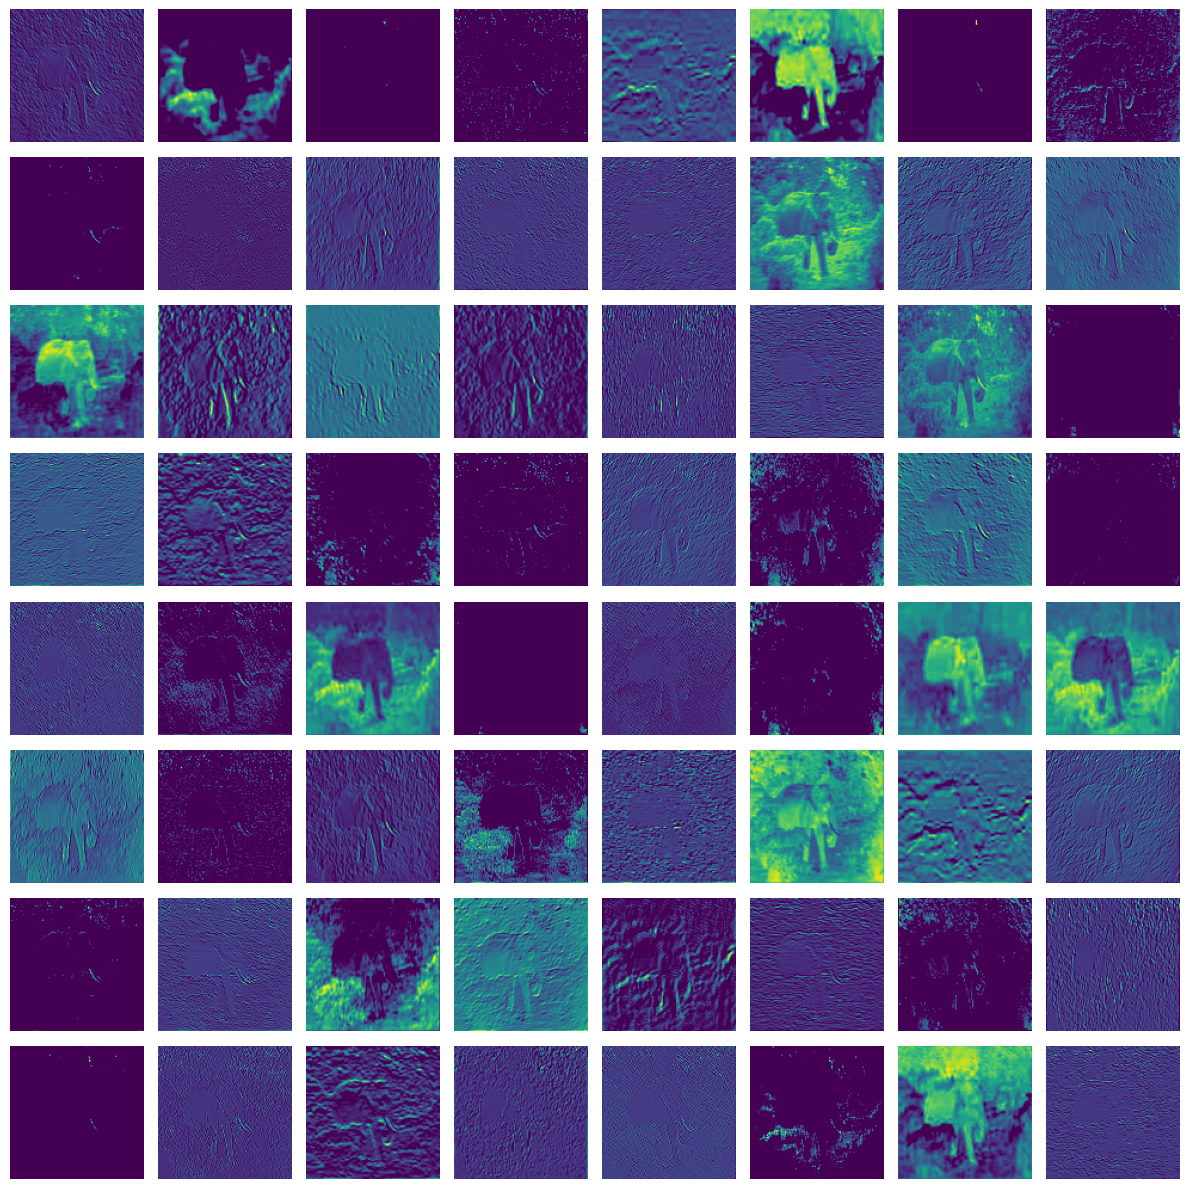

filters activations at activation layer 2, shape (56, 56, 64)
filters 0 - 64


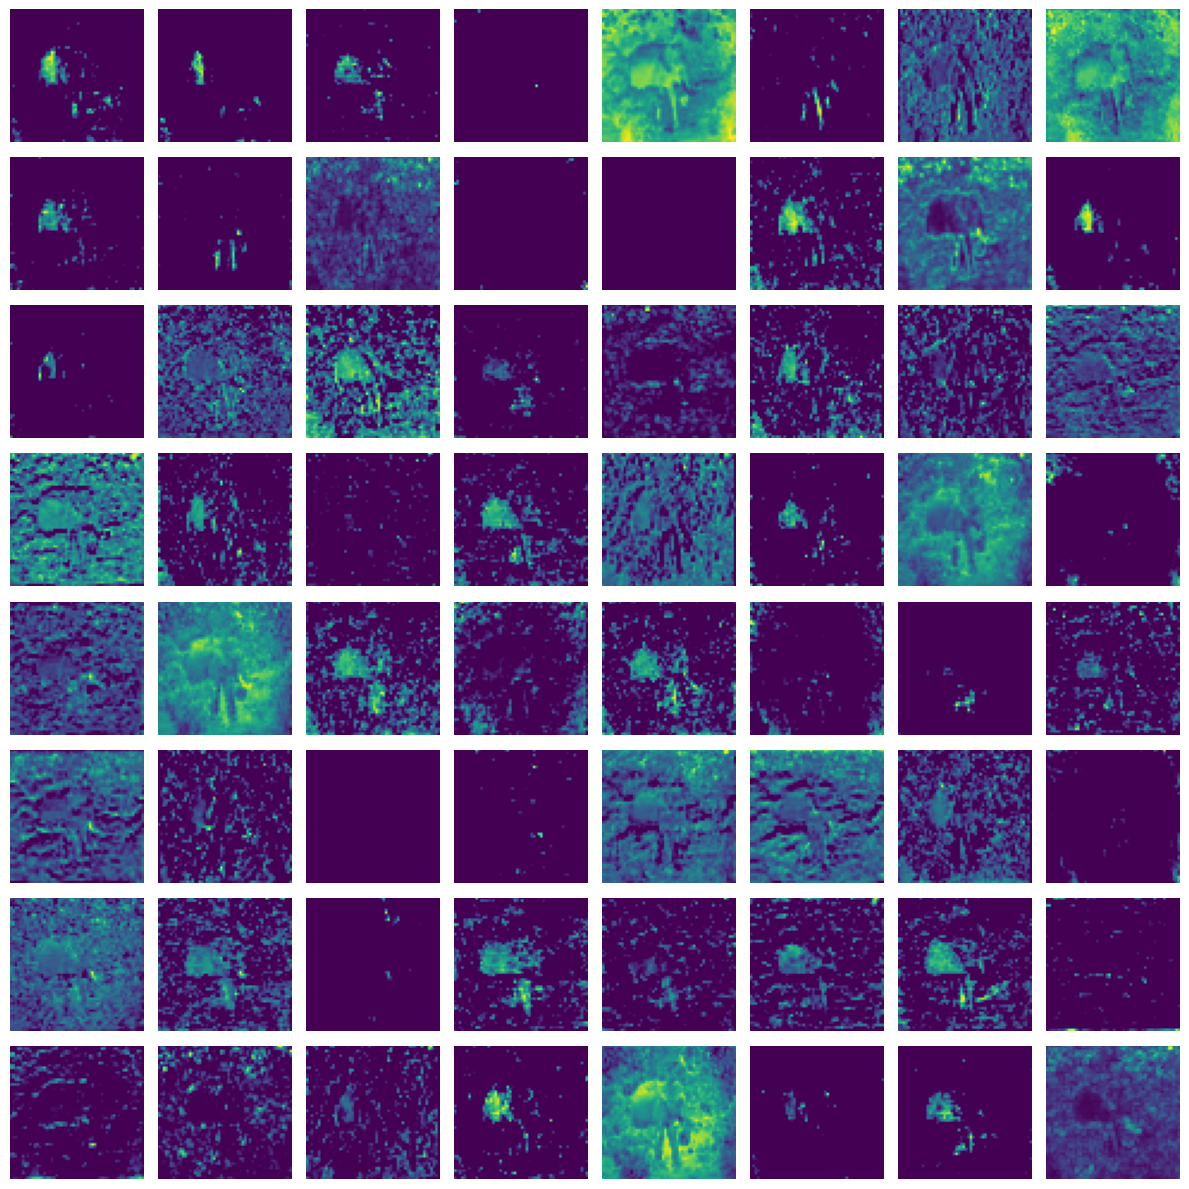

filters activations at activation layer 6, shape (56, 56, 64)
filters 0 - 64


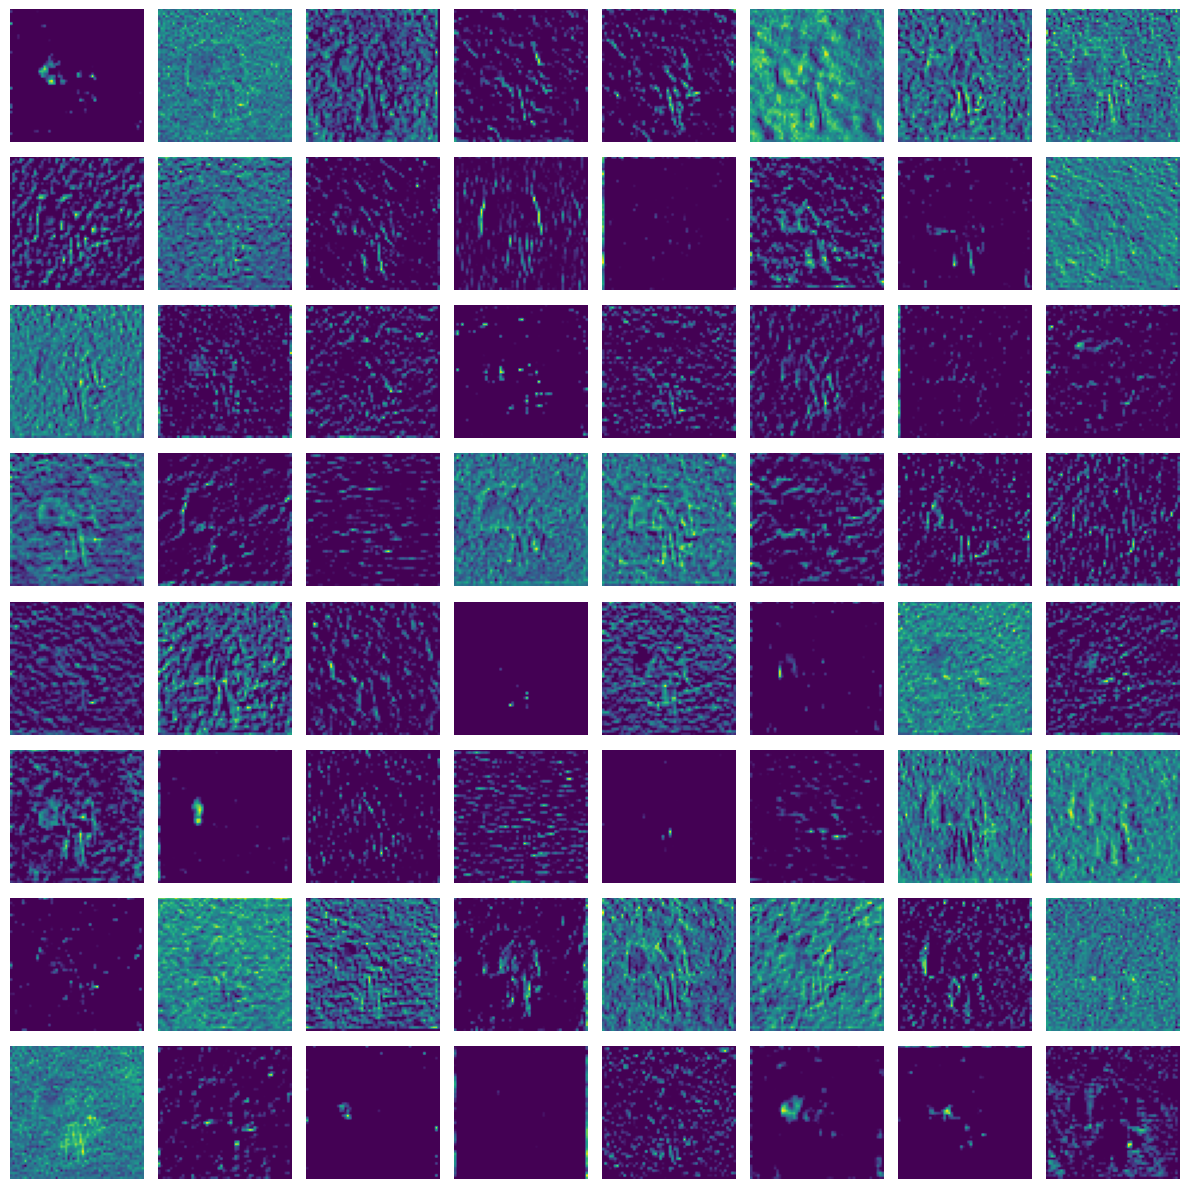

In [107]:
# check the initial layers
layers_pos = [0, 1, 5]

for pos in layers_pos:
    images_filters = outputs[pos][0]
    print(f'filters activations at activation layer {pos+1}, shape {images_filters.shape}')
    plot_one_layer_output(images_filters)

In [ ]:
# check the middle layers
layers_pos = [10, 20, 25]

for pos in layers_pos:
    images_filters = outputs[pos][0]
    print(f'filters activations at activation layer {pos+1}, shape {images_filters.shape}')
    plot_one_layer_output(images_filters)

In [ ]:
# check the last layers, too messy
layers_pos = [30, 40, 48]

for pos in layers_pos:
    images_filters = outputs[pos][0]
    print(f'filters activations at activation layer {pos+1}, shape {images_filters.shape}')
    plot_one_layer_output(images_filters)